<a href="https://colab.research.google.com/github/SBGuillermo/TFM-AnalisisComercio/blob/main/Notebooks/3_Analisis_cesta_compra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de la cesta de la compra



En este notebooks vamos a desarrollar el método de anáisis de la cesta de la compra. 
Este método consiste en encontrar las relaciones existentes entre los distintos elementos o grupos de elementos, a la venta en un negocio, que se suelen comprar juntos

Descargaremos el dataset que esta dividido en dos partes, para posteriormente concatanarlo y trabajar sobre él.

In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

Populating the interactive namespace from numpy and matplotlib


In [2]:
!wget https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table1.csv

--2021-07-09 10:54:42--  https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17889332 (17M) [text/plain]
Saving to: ‘Table1.csv’

Table1.csv          100%[===================>]  17.06M  82.1MB/s    in 0.2s    

2021-07-09 10:54:43 (82.1 MB/s) - ‘Table1.csv’ saved [17889332/17889332]



In [3]:
!wget https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table2.csv

--2021-07-09 10:54:43--  https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17784301 (17M) [text/plain]
Saving to: ‘Table2.csv’

Table2.csv          100%[===================>]  16.96M  27.7MB/s    in 0.6s    

2021-07-09 10:54:44 (27.7 MB/s) - ‘Table2.csv’ saved [17784301/17784301]



In [4]:
df1 = pd.read_csv('/content/Table1.csv')
df1

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,285947,561967,22400,other,3,2011-08-01 13:11:00,0.39,12844.0,United Kingdom,1.17
199996,199996,285948,561967,82482,WOODEN PICTURE FRAME WHITE FINISH,5,2011-08-01 13:11:00,2.55,12844.0,United Kingdom,12.75
199997,199997,285949,561967,82551,other,3,2011-08-01 13:11:00,1.45,12844.0,United Kingdom,4.35
199998,199998,285950,561967,82552,other,3,2011-08-01 13:11:00,1.45,12844.0,United Kingdom,4.35


In [5]:
df2 = pd.read_csv('/content/Table2.csv')
df2

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,200000,285952,561967,23306,other,3,2011-08-01 13:11:00,1.45,12844.0,United Kingdom,4.35
1,200001,285953,561967,47504H,other,1,2011-08-01 13:11:00,0.79,12844.0,United Kingdom,0.79
2,200002,285954,561967,21907,other,6,2011-08-01 13:11:00,2.10,12844.0,United Kingdom,12.60
3,200003,285955,561967,21992,other,3,2011-08-01 13:11:00,1.25,12844.0,United Kingdom,3.75
4,200004,285956,561967,21754,other,2,2011-08-01 13:11:00,5.95,12844.0,United Kingdom,11.90
...,...,...,...,...,...,...,...,...,...,...,...
197919,397919,541904,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
197920,397920,541905,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
197921,397921,541906,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
197922,397922,541907,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [6]:
df = pd.concat([df1,df2], axis=0)
df

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...
197919,397919,541904,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
197920,397920,541905,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
197921,397921,541906,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
197922,397922,541907,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [7]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

El método de cesta de la compra necesita saber los diferentes elementos que compra cada cliente en cada transacción. 
Para ello, utilizaremos el OneHotEncoder sobre los elementos a la venta de nuestro catálogo.
Con este proceso convertimos una columna en multiples, asignando como encabezado cada uno de los elementos en venta, y estableciendo que elementos ha comprado cada cliente en cada transacción

In [8]:
encoder = OneHotEncoder()

encoded = encoder.fit_transform(df['Description'].dropna().values.reshape(-1, 1))

encoded.todense()

matrix([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]])

In [9]:
encoder.categories_

[array(['ALARM CLOCK BAKELIKE RED', 'ASSORTED COLOUR BIRD ORNAMENT',
        'HEART OF WICKER SMALL', 'JAM MAKING SET WITH JARS',
        'JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT',
        'LUNCH BAG  BLACK SKULL.', 'LUNCH BAG APPLE DESIGN',
        'LUNCH BAG CARS BLUE', 'LUNCH BAG PINK POLKADOT',
        'LUNCH BAG RED RETROSPOT', 'LUNCH BAG SPACEBOY DESIGN',
        'LUNCH BAG SUKI DESIGN', 'NATURAL SLATE HEART CHALKBOARD',
        'PACK OF 72 RETROSPOT CAKE CASES',
        "PAPER CHAIN KIT 50'S CHRISTMAS", 'PARTY BUNTING', 'POSTAGE',
        'REGENCY CAKESTAND 3 TIER', 'REX CASH+CARRY JUMBO SHOPPER',
        'SET OF 3 CAKE TINS PANTRY DESIGN', 'SET OF 4 PANTRY JELLY MOULDS',
        'SPOTTY BUNTING', 'WHITE HANGING HEART T-LIGHT HOLDER',
        'WOODEN PICTURE FRAME WHITE FINISH', 'other'], dtype=object)]

In [10]:
result_encoding = pd.DataFrame(encoded.todense(), index = df['Description'].dropna().index, columns = encoder.categories_)

In [11]:
result_encoding

,ALARM CLOCK BAKELIKE RED,ASSORTED COLOUR BIRD ORNAMENT,HEART OF WICKER SMALL,JAM MAKING SET WITH JARS,JUMBO BAG PINK POLKADOT,JUMBO BAG RED RETROSPOT,LUNCH BAG BLACK SKULL.,LUNCH BAG APPLE DESIGN,LUNCH BAG CARS BLUE,LUNCH BAG PINK POLKADOT,LUNCH BAG RED RETROSPOT,LUNCH BAG SPACEBOY DESIGN,LUNCH BAG SUKI DESIGN,NATURAL SLATE HEART CHALKBOARD,PACK OF 72 RETROSPOT CAKE CASES,PAPER CHAIN KIT 50'S CHRISTMAS,PARTY BUNTING,POSTAGE,REGENCY CAKESTAND 3 TIER,REX CASH+CARRY JUMBO SHOPPER,SET OF 3 CAKE TINS PANTRY DESIGN,SET OF 4 PANTRY JELLY MOULDS,SPOTTY BUNTING,WHITE HANGING HEART T-LIGHT HOLDER,WOODEN PICTURE FRAME WHITE FINISH,other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Debemos eliminar la columna 'other' ya que no es un elemento como tal

In [12]:
result_encoding = result_encoding.drop(['other'], axis=1)

In [13]:
result_encoding.columns

MultiIndex([(          'ALARM CLOCK BAKELIKE RED',),
            (     'ASSORTED COLOUR BIRD ORNAMENT',),
            (             'HEART OF WICKER SMALL',),
            (          'JAM MAKING SET WITH JARS',),
            (           'JUMBO BAG PINK POLKADOT',),
            (           'JUMBO BAG RED RETROSPOT',),
            (           'LUNCH BAG  BLACK SKULL.',),
            (            'LUNCH BAG APPLE DESIGN',),
            (               'LUNCH BAG CARS BLUE',),
            (           'LUNCH BAG PINK POLKADOT',),
            (           'LUNCH BAG RED RETROSPOT',),
            (         'LUNCH BAG SPACEBOY DESIGN',),
            (             'LUNCH BAG SUKI DESIGN',),
            (    'NATURAL SLATE HEART CHALKBOARD',),
            (   'PACK OF 72 RETROSPOT CAKE CASES',),
            (    'PAPER CHAIN KIT 50'S CHRISTMAS',),
            (                     'PARTY BUNTING',),
            (                           'POSTAGE',),
            (          'REGENCY CAKESTAND 3 TI

In [14]:
result_encoding.columns = ['WHITE HANGING HEART T-LIGHT HOLDER', 'REGENCY CAKESTAND 3 TIER',
       'JUMBO BAG RED RETROSPOT', 'ASSORTED COLOUR BIRD ORNAMENT',
       'PARTY BUNTING', 'LUNCH BAG RED RETROSPOT',
       'SET OF 3 CAKE TINS PANTRY DESIGN', 'LUNCH BAG  BLACK SKULL.',
       'JAM MAKING SET PRINTED', 'PACK OF 72 RETROSPOT CAKE CASES',
       "PAPER CHAIN KIT 50'S CHRISTMAS", 'SPOTTY BUNTING',
       'LUNCH BAG SPACEBOY DESIGN', 'LUNCH BAG CARS BLUE',
       'HEART OF WICKER SMALL', 'NATURAL SLATE HEART CHALKBOARD',
       'LUNCH BAG PINK POLKADOT', 'REX CASH+CARRY JUMBO SHOPPER',
       'LUNCH BAG SUKI DESIGN', 'ALARM CLOCK BAKELIKE RED',
       'LUNCH BAG APPLE DESIGN', 'SET OF 4 PANTRY JELLY MOULDS',
       'JUMBO BAG PINK POLKADOT', 'JAM MAKING SET WITH JARS',
       'WOODEN PICTURE FRAME WHITE FINISH']

Debemos concatenar la tabla inicial con la tabla resultante de los elementos a la venta para relacionar cada una de las transacciones con los elementos comprados

In [15]:
partial_final_table = df.drop(['Description','Quantity','UnitPrice','StockCode'], axis=1)
partial_final_table

,InvoiceNo,InvoiceDate,CustomerID,Country,PrecioTotal
0,536365,2010-12-01 08:26:00,17850.0,United Kingdom,15.30
1,536365,2010-12-01 08:26:00,17850.0,United Kingdom,20.34
2,536365,2010-12-01 08:26:00,17850.0,United Kingdom,22.00
3,536365,2010-12-01 08:26:00,17850.0,United Kingdom,20.34
4,536365,2010-12-01 08:26:00,17850.0,United Kingdom,20.34
...,...,...,...,...,...
197919,581587,2011-12-09 12:50:00,12680.0,France,10.20
197920,581587,2011-12-09 12:50:00,12680.0,France,12.60
197921,581587,2011-12-09 12:50:00,12680.0,France,16.60
197922,581587,2011-12-09 12:50:00,12680.0,France,16.60


In [16]:
total_final_table = pd.concat([partial_final_table, result_encoding], axis=1)
total_final_table

,InvoiceNo,InvoiceDate,CustomerID,Country,PrecioTotal,WHITE HANGING HEART T-LIGHT HOLDER,REGENCY CAKESTAND 3 TIER,JUMBO BAG RED RETROSPOT,ASSORTED COLOUR BIRD ORNAMENT,PARTY BUNTING,LUNCH BAG RED RETROSPOT,SET OF 3 CAKE TINS PANTRY DESIGN,LUNCH BAG BLACK SKULL.,JAM MAKING SET PRINTED,PACK OF 72 RETROSPOT CAKE CASES,PAPER CHAIN KIT 50'S CHRISTMAS,SPOTTY BUNTING,LUNCH BAG SPACEBOY DESIGN,LUNCH BAG CARS BLUE,HEART OF WICKER SMALL,NATURAL SLATE HEART CHALKBOARD,LUNCH BAG PINK POLKADOT,REX CASH+CARRY JUMBO SHOPPER,LUNCH BAG SUKI DESIGN,ALARM CLOCK BAKELIKE RED,LUNCH BAG APPLE DESIGN,SET OF 4 PANTRY JELLY MOULDS,JUMBO BAG PINK POLKADOT,JAM MAKING SET WITH JARS,WOODEN PICTURE FRAME WHITE FINISH
0,536365,2010-12-01 08:26:00,17850.0,United Kingdom,15.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,536365,2010-12-01 08:26:00,17850.0,United Kingdom,20.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,536365,2010-12-01 08:26:00,17850.0,United Kingdom,22.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,536365,2010-12-01 08:26:00,17850.0,United Kingdom,20.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,536365,2010-12-01 08:26:00,17850.0,United Kingdom,20.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197919,581587,2011-12-09 12:50:00,12680.0,France,10.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197920,581587,2011-12-09 12:50:00,12680.0,France,12.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197921,581587,2011-12-09 12:50:00,12680.0,France,16.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197922,581587,2011-12-09 12:50:00,12680.0,France,16.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


El método de la cesta de la compra solo puede procesar una matriz de 0 y 1.

Primeramente, establecemos el número de la transacción como indice y unimos todas las compras hechas en la misma transacción

In [17]:
bypurchase_tabel = total_final_table.drop(['InvoiceDate','Country','CustomerID','PrecioTotal'], axis=1)
bypurchase_tabel = bypurchase_tabel.groupby(['InvoiceNo']).sum()
bypurchase_tabel

,WHITE HANGING HEART T-LIGHT HOLDER,REGENCY CAKESTAND 3 TIER,JUMBO BAG RED RETROSPOT,ASSORTED COLOUR BIRD ORNAMENT,PARTY BUNTING,LUNCH BAG RED RETROSPOT,SET OF 3 CAKE TINS PANTRY DESIGN,LUNCH BAG BLACK SKULL.,JAM MAKING SET PRINTED,PACK OF 72 RETROSPOT CAKE CASES,PAPER CHAIN KIT 50'S CHRISTMAS,SPOTTY BUNTING,LUNCH BAG SPACEBOY DESIGN,LUNCH BAG CARS BLUE,HEART OF WICKER SMALL,NATURAL SLATE HEART CHALKBOARD,LUNCH BAG PINK POLKADOT,REX CASH+CARRY JUMBO SHOPPER,LUNCH BAG SUKI DESIGN,ALARM CLOCK BAKELIKE RED,LUNCH BAG APPLE DESIGN,SET OF 4 PANTRY JELLY MOULDS,JUMBO BAG PINK POLKADOT,JAM MAKING SET WITH JARS,WOODEN PICTURE FRAME WHITE FINISH
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581585,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


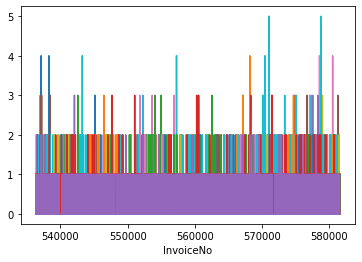

In [18]:
bypurchase_tabel.plot(legend=False)

En la tabla anterior vemos que el DataFrame que se ha creado, al agrupar los elementos por compra, no es una matriz dispersa de 0 y 1.

Por lo que el paso siguiente sería convetir todos esos datos en 0 y 1

Para ello conservaremos los 0 como estan y convertiremos todas las demás cantidades a 1

In [19]:
for x in range (0, len(bypurchase_tabel)):
  for y in range (0, len(bypurchase_tabel.columns)):
    if bypurchase_tabel.iloc[x,y] > 0:
      bypurchase_tabel.iloc[x,y] = 1

In [20]:
bypurchase_tabel

,WHITE HANGING HEART T-LIGHT HOLDER,REGENCY CAKESTAND 3 TIER,JUMBO BAG RED RETROSPOT,ASSORTED COLOUR BIRD ORNAMENT,PARTY BUNTING,LUNCH BAG RED RETROSPOT,SET OF 3 CAKE TINS PANTRY DESIGN,LUNCH BAG BLACK SKULL.,JAM MAKING SET PRINTED,PACK OF 72 RETROSPOT CAKE CASES,PAPER CHAIN KIT 50'S CHRISTMAS,SPOTTY BUNTING,LUNCH BAG SPACEBOY DESIGN,LUNCH BAG CARS BLUE,HEART OF WICKER SMALL,NATURAL SLATE HEART CHALKBOARD,LUNCH BAG PINK POLKADOT,REX CASH+CARRY JUMBO SHOPPER,LUNCH BAG SUKI DESIGN,ALARM CLOCK BAKELIKE RED,LUNCH BAG APPLE DESIGN,SET OF 4 PANTRY JELLY MOULDS,JUMBO BAG PINK POLKADOT,JAM MAKING SET WITH JARS,WOODEN PICTURE FRAME WHITE FINISH
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581585,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


En la tabla siguiente se puede ver que todos los elementos son o 0 o 1

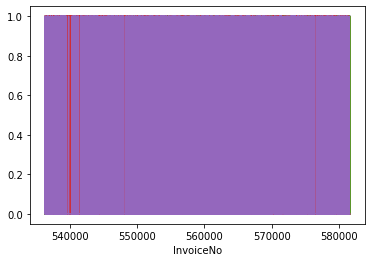

In [21]:
bypurchase_tabel.plot(legend=False)

### Método de la cesta de la compra

El método de la cesta de la compra se basa en reglas de asociación tiene varias variables a tener en cuenta:

- support: esta variable establece la frecuencia con la que un elemento aparece en los datos

- antecedents: que es el elemento, o grupo de elementos, del que partimos para crear la asociación

- consequents: que es el elemento al que llegamos tras la asociación

- métrica lift: es la métrica que vamos a utilizar y tiene la ventaja de que los antecedents y los consequents son intercambiables

In [22]:
frequent_itemsets = apriori(bypurchase_tabel, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.047313,(WHITE HANGING HEART T-LIGHT HOLDER)
1,0.074180,(REGENCY CAKESTAND 3 TIER)
2,0.051845,(JUMBO BAG RED RETROSPOT)
3,0.047421,(ASSORTED COLOUR BIRD ORNAMENT)
4,0.046990,(PARTY BUNTING)
...,...,...
99,0.011006,"(SPOTTY BUNTING, JAM MAKING SET PRINTED, LUNCH..."
100,0.013541,"(SPOTTY BUNTING, PAPER CHAIN KIT 50'S CHRISTMA..."
101,0.013595,"(LUNCH BAG SPACEBOY DESIGN, PAPER CHAIN KIT 50..."
102,0.012354,"(SPOTTY BUNTING, LUNCH BAG SPACEBOY DESIGN, PA..."


Al crear las reglas de asociación establecemos un threshold minimo de 1, ya que tenemos una cantidad de datos limitada. El threshold igual a 1 significa que la posibilidad de que dos elementos se compren a la vez es igual al azar

In [23]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LUNCH BAG PINK POLKADOT),(REGENCY CAKESTAND 3 TIER),0.074450,0.074180,0.010412,0.139855,1.885348,0.004889,1.076354
1,(REGENCY CAKESTAND 3 TIER),(LUNCH BAG PINK POLKADOT),0.074180,0.074450,0.010412,0.140364,1.885348,0.004889,1.076677
2,(LUNCH BAG SUKI DESIGN),(REGENCY CAKESTAND 3 TIER),0.091929,0.074180,0.012462,0.135563,1.827493,0.005643,1.071010
3,(REGENCY CAKESTAND 3 TIER),(LUNCH BAG SUKI DESIGN),0.074180,0.091929,0.012462,0.168000,1.827493,0.005643,1.091431
4,(REGENCY CAKESTAND 3 TIER),(JAM MAKING SET WITH JARS),0.074180,0.106334,0.014620,0.197091,1.853515,0.006732,1.113036
...,...,...,...,...,...,...,...,...,...
265,"(PACK OF 72 RETROSPOT CAKE CASES, SET OF 3 CAK...","(JAM MAKING SET PRINTED, PAPER CHAIN KIT 50'S ...",0.025032,0.024709,0.010412,0.415948,16.834099,0.009794,1.669871
266,(JAM MAKING SET PRINTED),"(PAPER CHAIN KIT 50'S CHRISTMAS, PACK OF 72 RE...",0.052115,0.016616,0.010412,0.199793,12.023904,0.009546,1.228912
267,(PAPER CHAIN KIT 50'S CHRISTMAS),"(JAM MAKING SET PRINTED, PACK OF 72 RETROSPOT ...",0.069486,0.014027,0.010412,0.149845,10.682776,0.009438,1.159757
268,(PACK OF 72 RETROSPOT CAKE CASES),"(JAM MAKING SET PRINTED, PAPER CHAIN KIT 50'S ...",0.050227,0.014135,0.010412,0.207304,14.666361,0.009702,1.243686


Para establecer cual son los elemntos con relaciones de asociación más fuertes, filtramos nuestros datos según la métrica lift.

Este filtro nos dejaria una cantidad muy grande de datos por lo cual aplicamos un segundo filtro con la métrica confidente, que nos dice la probabilidad que hay de que al compar un objeto se compre otro.

En esta probabilidad el orden no es intercambiable y podemos encontrar un segundo elemento con una alta probabilidad de compra si ya se ha comprado un primer objeto, pero si ese segundo elemento es el primero que se compra, no existir dicha probabilidad de compra del primero. 

In [24]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.7) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
245,"(LUNCH BAG SPACEBOY DESIGN, PACK OF 72 RETROSP...",(PAPER CHAIN KIT 50'S CHRISTMAS),0.019314,0.069486,0.013595,0.703911,10.130192,0.012253,3.142678
257,"(JAM MAKING SET PRINTED, PAPER CHAIN KIT 50'S ...",(PACK OF 72 RETROSPOT CAKE CASES),0.014135,0.050227,0.010412,0.736641,14.666361,0.009702,3.606386
258,"(JAM MAKING SET PRINTED, PACK OF 72 RETROSPOT ...",(PAPER CHAIN KIT 50'S CHRISTMAS),0.014027,0.069486,0.010412,0.742308,10.682776,0.009438,3.610948


### Conclusiones

- este mètodo nos sirve para establecer relaciones entre objetos en venta

- este nos puede llevar a la modificación de la distribución de la tienda o del catálogo de nuestro negocio, poniendo elementos muy relacionados en los extremos de la tienda o del catálogo.

- tambíen nos puede servir para desarrollar packs con elementos muy relacionados

- En el caso concreto que hemos analizado podemos observar que exite una relación muy estrecha entre los distintos objetos de fiesta
